<a href="https://colab.research.google.com/github/shr968/marvel/blob/main/Logistic_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1sbY5jOVRCB1kiQj23PeOpltGgBLJ36bF
To: /content/student_exam_data.txt
100%|██████████| 3.98k/3.98k [00:00<00:00, 10.0MB/s]


Cleaned data:
     feature1   feature2  label
0  34.623660  78.024693      0
1  30.286711  43.894998      0
2  35.847409  72.902198      0
3  60.182599  86.308552      1
4  79.032736  75.344376      1
Final cost: 0.6249857589104834
Parameters: [-0.06946097  0.01090733  0.00099135]


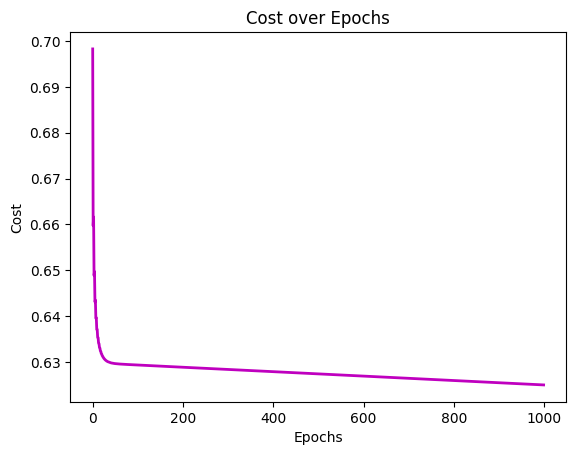

Prediction for sample input [5.0, 3.0]: 0


<ipython-input-2-3578055ec3d8>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction for sample input [5.0, 3.0]:", int(prediction))


In [2]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt

url = "https://drive.google.com/uc?id=1sbY5jOVRCB1kiQj23PeOpltGgBLJ36bF"
output = "student_exam_data.txt"
gdown.download(url, output, quiet=False)

def load_data(filename):
    df = pd.read_csv(filename, header=None)
    df = df[0].str.split(',', expand=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ["feature1", "feature2", "label"]

    print("Cleaned data:\n", df.head())

    return df[["feature1", "feature2"]].values, df["label"].values

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, y, theta):
    m = len(y)
    h_x = sigmoid(np.dot(x, theta))
    epsilon = 1e-5
    h_x = np.clip(h_x, epsilon, 1 - epsilon)

    cost = -(1 / m) * np.sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x))
    return cost

def gradient_descent(x, y, theta, learning_rate=0.01, num_epochs=1000):
    m = len(y)
    J_all = []

    for _ in range(num_epochs):
        h_x = sigmoid(np.dot(x, theta))
        gradient = (1 / m) * np.dot(x.T, (h_x - y))
        theta -= learning_rate * gradient
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

def plot_cost(J_all, num_epochs):
    plt.plot(range(num_epochs), J_all, 'm', linewidth=2)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost over Epochs")
    plt.show()

def predict(x, theta):
    return sigmoid(np.dot(x, theta)) >= 0.5

x, y = load_data(output)
y = y.reshape(-1, 1)
x = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.zeros((x.shape[1], 1))

learning_rate = 0.001
num_epochs = 1000

theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
print("Final cost:", J_all[-1])
print("Parameters:", theta.ravel())

plot_cost(J_all, num_epochs)

sample_input = np.array([1, 5.0, 3.0])
prediction = predict(sample_input, theta)
print("Prediction for sample input [5.0, 3.0]:", int(prediction))
